# Projekt (Wprowadzenie do uczenia maszynowego)

## Wykonawcy:
* Piotr Mariusz Kozikowski
* Kacper Dulewicz
* Anna Kaczmarek

### Matematyka stosowana, II semestr, studia II stopnia

## Analiza skupień

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import seaborn as sns

In [2]:
pokemon_df = pd.read_csv('pokemon_clean.csv')
pokemon_df

,Unnamed: 0,class,hp,attack,defense,sp_attack,sp_defense,speed,num_class
0,0,Grass,45,49,49,65,65,45,1
1,1,Grass,60,62,63,80,80,60,1
2,2,Grass,80,82,83,100,100,80,1
3,3,Grass,80,100,123,122,120,80,1
4,4,Grass,80,82,83,100,100,80,1
...,...,...,...,...,...,...,...,...,...
1067,1067,Ice,100,145,130,65,110,30,11
1068,1068,Ghost,100,65,60,145,80,130,17
1069,1069,Psychic,100,80,80,80,80,80,15
1070,1070,Psychic,100,165,150,85,130,50,15


In [3]:
pokemon_df = pokemon_df.iloc[:, 1:]
pokemon_df

,class,hp,attack,defense,sp_attack,sp_defense,speed,num_class
0,Grass,45,49,49,65,65,45,1
1,Grass,60,62,63,80,80,60,1
2,Grass,80,82,83,100,100,80,1
3,Grass,80,100,123,122,120,80,1
4,Grass,80,82,83,100,100,80,1
...,...,...,...,...,...,...,...,...
1067,Ice,100,145,130,65,110,30,11
1068,Ghost,100,65,60,145,80,130,17
1069,Psychic,100,80,80,80,80,80,15
1070,Psychic,100,165,150,85,130,50,15


In [4]:
# Nazwy kolumn do tabeli porównawczej
comparison_col_names = ["Metoda", "Liczba klastrów", "Silhouette Score", "ARI (Adjusted Rand Index)"]

# Utworzenie ramki danych służącej do porównań metod klasteryzacji
comparison_df = pd.DataFrame(columns=comparison_col_names)

In [5]:
# Przygotowanie danych do analizy (wykluczenie etykiet klas)
features = pokemon_df.drop(columns=["class","num_class"])
class_labels = pokemon_df["num_class"]

# Standaryzacja danych
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
# Funkcja tworząca heatmapę pokazującą liczbę pokemonów w oryginalnych klasach w odniesieniu do wyników klasteryzacji
def table_class_and_clusters_heat(classes_df, clusters_df):
    
    class_and_clusters_df = pd.DataFrame({
        'Klasa': classes_df,
        'Skupienie': clusters_df
    })

    # Grupowanie danych i liczenie ilości w każdej kombinacji
    group_table = class_and_clusters_df.groupby(['Skupienie', 'Klasa']).size().unstack(fill_value=0)

    figsize_x = group_table.shape[1] * 0.5 
    figsize_y = group_table.shape[0] * 0.5 
    
    plt.figure(figsize=(figsize_x, figsize_y))
    ax = sns.heatmap(
        group_table,
        annot=True,     
        fmt="d",        
        cmap="coolwarm", 
        linewidths=.5,   
        cbar_kws={'label': 'Liczba obiektów'}
    )
    
    ax.xaxis.set_ticks_position('top') 
    ax.xaxis.set_label_position('top') 
    
    plt.xlabel("Klasa")
    plt.ylabel("Skupienie")
    plt.show()

### Metody hierarchiczne

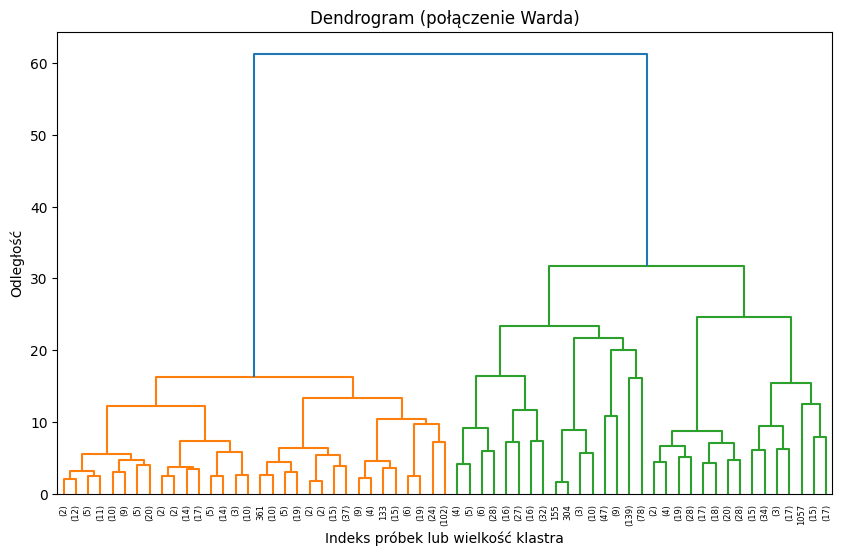

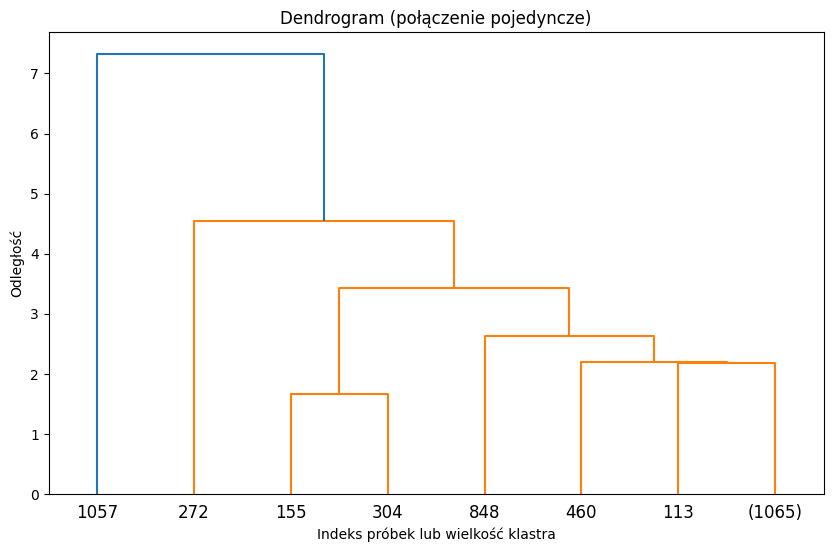

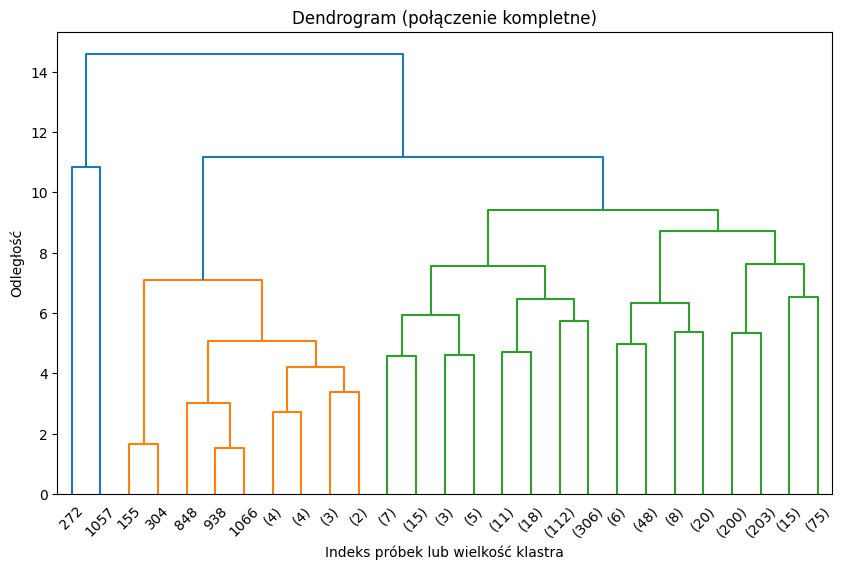

In [7]:
# Utworzenie listy metod połączeń klastrów
linkage_methods = ["ward", "single", "complete"]
# Utworzenie listy polskich nazw tych metod
linkage_pl_names = ["Warda", "pojedyncze", "kompletne"]

# Wyznaczenie dendrogramów dla poszczególnych metod połączeń
for method, method_name in zip(linkage_methods, linkage_pl_names):
    linked = linkage(features_scaled, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(linked, truncate_mode="level", p=5)
    plt.title(f"Dendrogram (połączenie {method_name})")
    plt.xlabel("Indeks próbek lub wielkość klastra")
    plt.ylabel("Odległość")
    plt.show()

**Podział na klastry**

* Połączenie Warda - 3 klastry,
* Połączenie pojedyncze - 3 klastry,
* Połączenie kompletne - 4 klastry.

In [8]:
# Utworzenie zbioru przechowującego połączenia klastrów jako funkcje
linkages = {}

# Obliczanie połączeń klastrów
for method in linkage_methods:
    linkages[method] = linkage(features_scaled, method=method)

# Generowanie klastrów na podstawie analizy dendrogramów (ustalona liczba klastrów)
clusters_ward = fcluster(linkages["ward"], t=3, criterion='maxclust')
clusters_single = fcluster(linkages["single"], t=3, criterion='maxclust')
clusters_complete = fcluster(linkages["complete"], t=4, criterion='maxclust')

# Utworzenie listy danych zawierających wygenerowane klastry
clusters = [clusters_ward, clusters_single, clusters_complete]

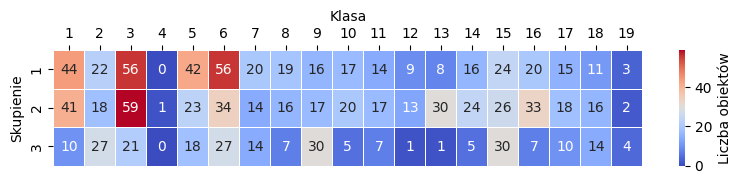

In [9]:
# Heatmapa z licznością pokemonów dla połączenia Warda
table_class_and_clusters_heat(class_labels, clusters_ward)

* Skupienie 1: Grass (Trawa), Water (Woda), Bug (Robak), Normal (Normalny)
* Skupienie 2: Grass (Trawa), Water (Woda), Normal (Normalny), Steel (Stal), Rock (Kamień)
* Skupienie 3: Fire (Ogień), Normal (Normalny), Electric (Elektryczność), Psychic (Psychika)

**Wnioski:**

* Klasy 3 i 6 zdecydowanie dominują w skupieniu 1, osiągając największą wartość (56 obiektów), co sugeruje, że te klasy mają cechy, które je łączą.

* W skupieniu 2 najwięcej obiektów pochodzi z klasy 3 (59 obiektów).

* Skupienie 3 jest mniej zróżnicowane i obejmuje mniejsze liczby obiektów z różnych klas.

* Niektóre klasy są bardziej skoncentrowane w jednym skupieniu (np. klasa 5 w skupieniu 1, klasa 9 w skupieniu 3, klasy 13 i 16 w skupieniu 3), co wskazuje na silne powiązanie tych klas z konkretnymi skupieniami.

* Klasy takie jak 7, 15, 17 czy 18 mają obiekty bardziej równomiernie rozłożone między różne skupienia.

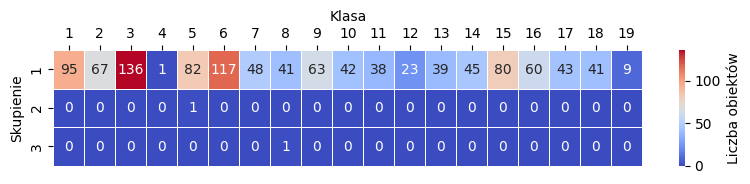

In [10]:
# Heatmapa z licznością pokemonów dla połączenia pojedynczego
table_class_and_clusters_heat(class_labels, clusters_single)

**Wnioski:**

* Skupienie 1 obejmuje zdecydowaną większość obiektów, w tym największe koncentracje w klasach: 3 (136 obiektów), 6 (117 obiektów), 1 (95 obiektów). Oznacza to, że rozkład jest bardzo nierównomierny.

* Skupienia 2 i 3 praktycznie nie zawierają obiektów, z wyjątkiem pojedynczych przypadków (np. klasa 5 z jednym obiektem w skupieniu 2 oraz klasa 8 z jednym obiektem w skupieniu 3). Wskazuje to na mało zróżnicowamy podział, co może wynikać np. z nieoptymalnego wyboru liczby skupień.

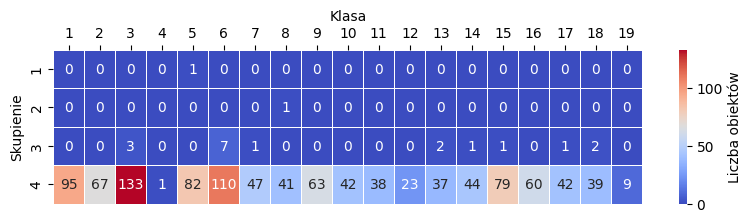

In [11]:
# Heatmapa z licznością pokemonów dla połączenia kompletnego
table_class_and_clusters_heat(class_labels, clusters_complete)

**Wnioski:**

* Skupienie 4 zawiera większość obiektów z niemal wszystkich klas, szczególnie klasy 3 (133 obiekty), 6 (110 obiektów) oraz 1 (95 obiektów). Wskazuje to na silną dominację tego skupienia w tej metodzie grupowania.

* W skupieniach 1, 2 i 3 pojawia się bardzo niewielka liczba obiektów, np. klasa 6 (7 obiektów w skupieniu 3), klasa 3 (3 obiekty w skupieniu 3).

* Aby uzyskać bardziej zróżnicowany podział, można by było rozważyć zwiększenie liczby skupień.

In [12]:
# Obliczanie wskaźników dla różnych metod wyznaczania odległości w metodzie hierarchicznej klasteryzacji
for linkage_method, linkage_name, cluster, cluster_num in zip(linkage_methods, linkage_pl_names, clusters, [3, 3, 4]):
    # Obliczanie Silhouette Score
    silhouette = silhouette_score(features_scaled, cluster)

    # Obliczanie ARI Score
    ari = adjusted_rand_score(class_labels, cluster)

    # Utworzenie podzbioru danych do umieszczenia w końcowej ramce danych
    data = {'Metoda': f'hierarchiczna (poł. {linkage_name})', 'Liczba klastrów': cluster_num, 'Silhouette Score': silhouette, 'ARI (Adjusted Rand Index)': ari}
    
    # Zapis zebranych danych w ramce danych
    comparison_df.loc[len(comparison_df.index)] = data

### Metoda k-średnich

In [13]:
# Użycie metody k-średnich
kmeans = KMeans(n_clusters=19, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Obliczanie Silhouette Score
silhouette_avg_kmeans = silhouette_score(features_scaled, kmeans_labels)

# Obliczanie ARI Score
ari_score_kmeans = adjusted_rand_score(class_labels, kmeans_labels)

# Znalezienie unikalnych numerów klastrów 
unique_kmeans_labels = np.unique(kmeans_labels)

# Utworzenie podzbioru danych do umieszczenia w końcowej ramce danych
kmeans_data = {'Metoda': 'k-średnich', 'Liczba klastrów': len(unique_kmeans_labels), 'Silhouette Score': silhouette_avg_kmeans,
        'ARI (Adjusted Rand Index)': ari_score_kmeans}

# Zapis zebranych danych w ramce danych
comparison_df.loc[len(comparison_df.index)] = kmeans_data

# Wypisanie numerów utworzonych klastrów
print(f"K-średnich - Klastry:", *unique_kmeans_labels)

K-średnich - Klastry: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18


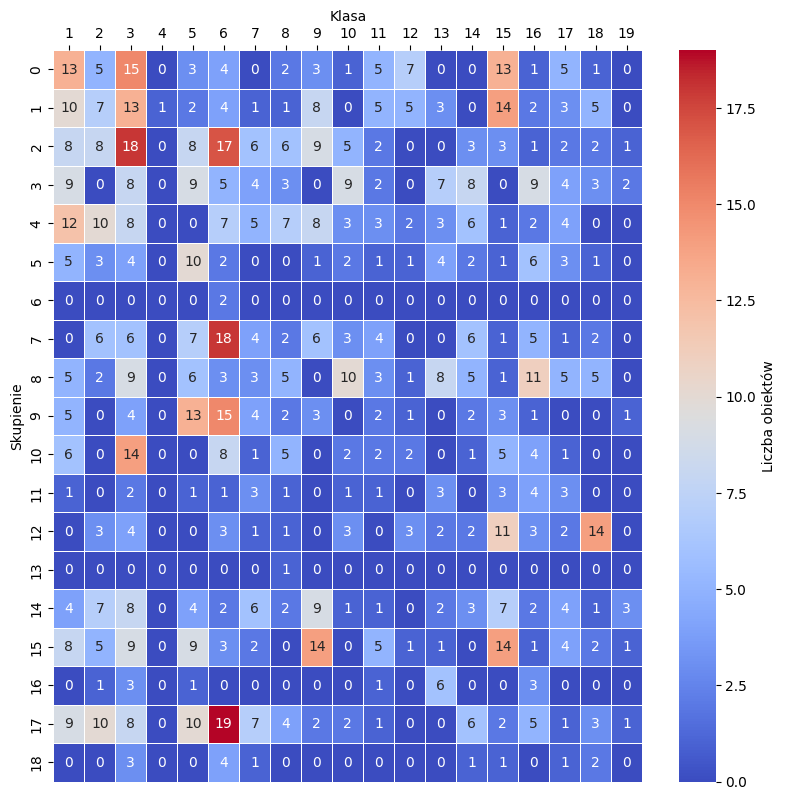

In [14]:
# Heatmapa z licznością pokemonów dla metody k-średnich
table_class_and_clusters_heat(class_labels, kmeans_labels)

* Skupienie 0: Grass (Trawa), Water (Woda), Psychic (Psychika)
* Skupienie 1: Grass (Trawa), Water (Woda), Psychic (Psychika)
* Skupienie 2: Water (Woda), Normal (Normalny)
* Skupienie 3: Grass (Trawa), Bug (Robak), Ground (Ziemia), Rock (Kamień)
* Skupienie 4: Grass (Trawa), Fire (Ogień)
* Skupienie 5: Bug (Robak)
* Skupienie 6: Normal (Normalny)
* Skupienie 7: Normal (Normalny)
* Skupienie 8: Water (Woda), Ground (Ziemia), Rock (Kamień)
* Skupienie 9: Bug (Robak), Normal (Normalny)
* Skupienie 10: Water (Woda)
* Skupienie 11: ciężko stwierdzić
* Skupienie 12: Psychic (Psychika), Dragon (Smok)
* Skupienie 13: Poison (Trucizna)
* Skupienie 14: Water (Woda), Electric (Elektryczność)
* Skupienie 15: Electric (Elektryczność), Psychic (Psychika)
* Skupienie 16: Steel (Stal)
* Skupienie 17: Normal (Normalny)
* Skupienie 18: Normal (Normalny)

**Wnioski:**

* Obiekty są bardziej równomiernie rozproszone w wielu skupieniach niż w metodach hierarchicznych.

* Niektóre klasy mają wyraźnie większą liczbę obiektów w pojedynczych skupieniach, np. klasa 3 w skupieniu 2, klasa 18 w skupieniu 12 oraz klasa 6 w skupieniach 2, 7 i 17.

* Duża liczba obiektów w kilku wybranychh skupieniach wskazuje na istnienie klas o bardziej zbliżonych cechach, natomiast mniejsze skupienia mogą reprezentować klasy, które są bardziej unikalne lub mniej liczne.

### Metoda DBSCAN

In [15]:
# Użycie metody DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Obliczanie Silhouette Score
silhouette_avg_dbscan = silhouette_score(features_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# Obliczanie ARI Score
ari_score_dbscan = adjusted_rand_score(class_labels, dbscan_labels)

# Znalezienie unikalnych numerów klastrów 
unique_dbscan_labels = np.unique(dbscan_labels)

# Utworzenie podzbioru danych do umieszczenia w końcowej ramce danych
dbscan_data = {'Metoda': 'DBSCAN', 'Liczba klastrów': len(unique_dbscan_labels), 'Silhouette Score': silhouette_avg_dbscan, 'ARI (Adjusted Rand Index)': ari_score_dbscan}

# Zapis zebranych danych w ramce danych
comparison_df.loc[len(comparison_df.index)] = dbscan_data

# Wypisanie numerów utworzonych klastrów
print(f"DBSCAN - Klastry:", *unique_dbscan_labels)

DBSCAN - Klastry: -1 0


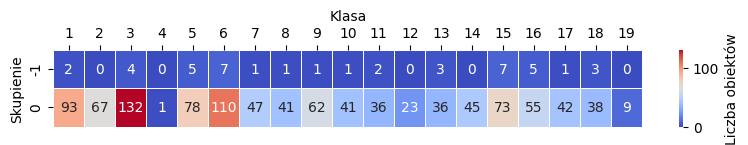

In [16]:
# Heatmapa z licznością pokemonów dla metody DBSCAN
table_class_and_clusters_heat(class_labels, dbscan_labels)

**Wnioski:**

* Większość obiektów z niemal wszystkich klas została przypisana do skupienia 0. Największe wartości w tym skupieniu dotyczą klas: 3 (132 obiekty), 6 (110 obiektów) oraz 1 (93 obiekty). Klasy te mogą mieć wspólne cechy, które powodują ich łączenie w jedno skupienie.

* Skupienie 1 zawiera niewielką liczbę obiektów w porównaniu do skupienia 0. Najwięcej ma klasa 6 i 15 (7 obiektów). Wskazuje to na brak równowagi w podziale na skupienia.

In [17]:
# Wyznaczenie liczby obserwacji oznaczonych jako szum (-1) przez metodę DBSCAN
outliers_count = sum(dbscan_labels == -1)
print(f'Procent obserwacji odstających otrzymanych metodą DBSCAN wynosi {outliers_count/len(pokemon_df.index)*100:.2f} %.')

Procent obserwacji odstających otrzymanych metodą DBSCAN wynosi 4.01 %.


**Wnioski:**

Wynik 4,01% pokazuje, że metoda DBSCAN dobrze radzi sobie z danymi i udało się zidentyfikować klarowne klastry z niewielką liczbą obserwacji odstających. Oznacza to, że jakość grupowania jest wysoka, a parametry dobrze dopasowane.

### Metoda klasteryzacji spektralnej

In [18]:
# Użycie metody klasteryzacji spektralnej
spectral = SpectralClustering(n_clusters=19, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(features_scaled)

# Obliczanie Silhouette Score
silhouette_avg_spectral = silhouette_score(features_scaled, spectral_labels)

# Obliczanie ARI Score
ari_score_spectral = adjusted_rand_score(class_labels, spectral_labels)

# Znalezienie unikalnych numerów klastrów 
unique_spectral_labels = np.unique(spectral_labels)

# Utworzenie podzbioru danych do umieszczenia w końcowej ramce danych
spectral_data = {'Metoda': 'klasteryzacja spektralna', 'Liczba klastrów': len(unique_spectral_labels), 'Silhouette Score': silhouette_avg_spectral, 'ARI (Adjusted Rand Index)': ari_score_spectral}

# Zapis zebranych danych w ramce danych
comparison_df.loc[len(comparison_df.index)] = spectral_data

# Wypisanie numerów utworzonych klastrów
print(f"Klasteryzacja spektralna - Klastry:", *unique_spectral_labels)

Klasteryzacja spektralna - Klastry: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18


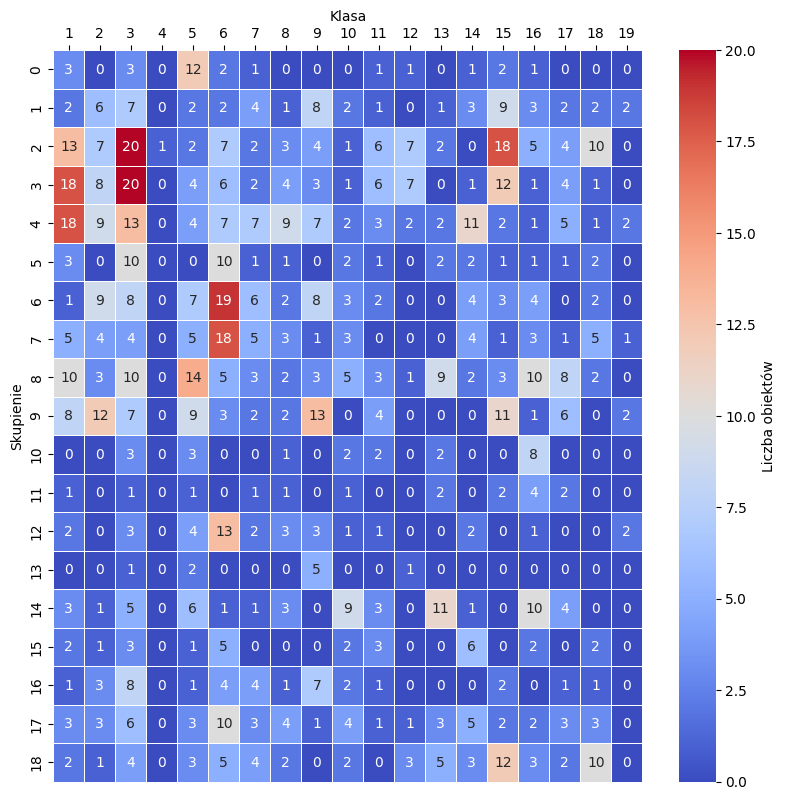

In [19]:
# Heatmapa z licznością pokemonów dla metody klasteryzacji spektralnej
table_class_and_clusters_heat(class_labels, spectral_labels)

* Skupienie 0: Bug (Robak)
* Skupienie 1: Electric (Elektryczność), Psychic (Psychika)
* Skupienie 2: Grass (Trawa), Water (Woda), Psychic (Psychika)
* Skupienie 3: Grass (Trawa), Water (Woda), Psychic (Psychika)
* Skupienie 4: Grass (Trawa), Water (Woda), Fighting (Walka)
* Skupienie 5: Water (Woda), Normal (Normalny)
* Skupienie 6: Normal (Normalny)
* Skupienie 7: Normal (Normalny)
* Skupienie 8: Bug (Robak)
* Skupienie 9: Fire (Ogień), Electric (Elektryczność), Psychic (Psychika)
* Skupienie 10: Rock (Kamień)
* Skupienie 11: ciężko stwierdzić
* Skupienie 12: Normal (Normalny)
* Skupienie 13: Electric (Elektryczny)
* Skupienie 14: Ground (Ziemia), Steel (Stal), Rock (Kamień)
* Skupienie 15: Normal (Normalny), Fighting (Walka)
* Skupienie 16: Water (Woda), Electric (Elektryczność)
* Skupienie 17: Normal (Normalny)
* Skupienie 18: Psychic (Psychika), Dragon (Smok)

**Wnioski:**

* Liczba obiektów jest stosunkowo równomiernie rozłożona między różne skupienia. Kilka skupień wyróżnia się większą ilością obiektów, np. klasa 3 ma po 20 obiektów w skupieniach 2 i 3, klasa 1 ma 18 obiektów w skupieniu 3 i 4.

* Wyraźne różnice w dominujących klasach w różnych skupieniach sugerują, że dane zostały skutecznie rozdzielone w oparciu o ich cechy.

In [20]:
# Wyświetlenie ramki danych
comparison_df

,Metoda,Liczba klastrów,Silhouette Score,ARI (Adjusted Rand Index)
0,hierarchiczna (poł. Warda),3,0.227490,0.008321
1,hierarchiczna (poł. pojedyncze),3,0.634184,0.000102
2,hierarchiczna (poł. kompletne),4,0.358254,-0.000695
3,k-średnich,19,0.158243,0.025156
4,DBSCAN,2,0.401260,-0.000349
5,klasteryzacja spektralna,19,0.100749,0.027030


**Wnioski:**

*Sillhouette Score*:

* Najlepszy wynik (0.634) osiągnięto metodą hierarchicznej klasteryzacji z połączeniem pojedynczym z 3 klastrami. Wskazuje to na wysoką spójność wewnątrz klastrów i dobrą separację między nimi.

* DBSCAN (0.401) również osiągnął stosunkowo wysoki wynik z 2 klastrami, co sugeruje, że metoda dobrze odwzorowała struktury w danych.

* Metoda hierarchiczna z połączeniem kompletnym uzyskała wynik 0.359, co wskazuje na umiarkowaną spójność klastrów z 4 grupami.

* Metoda K-Średnich (0.158) i Klasteryzacja Spektralna (0.101) uzyskały najniższe wyniki, co sugeruje problemy z wyraźnym podziałem danych przy 19 klastrach.

*ARI*:

* Najwyższe wyniki osiągnęła Klasteryzacja Spektralna (0.027) i metoda K-Średnich (0.025), co sugeruje, że te metody lepiej odwzorowały rzeczywisty podział danych, mimo niskich wyników Silhouette Score.

* Metoda hierarchiczna z połączeniem Warda uzyskała wynik 0.008, co oznacza, że klastry nie odwzorowały dobrze rzeczywistego podziału danych.

* Ujemne wyniki dla DBSCAN (-0.0003) i metody hierarchicznej z połączeniem kompletnym (-0.001) wskazują na brak zgodności między klastrami a rzeczywistymi etykietami.

*Podsumowanie*:

* Najlepszymi metodami pod względem spójności klastrów były: metoda hierarchiczna z połączeniem pojedynczym oraz DBSCAN, co oznacza, że wyznaczone klastry są spójne i dobrze odseperowane.

* Najlepsze metody pod kątem odwzorowania rzeczywistych etykiet to Klasteryzacja Spektralna i K-Średnich, co wskazuje, że metody te lepiej oddają rzeczywisty podział danych. Jednak ich Silhouette Score sugerują, że grupy są mniej spójne.